In [34]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aposteriori import ndfu


GRAPH_DIR = Path("./graphs")
sns.set_theme(style="whitegrid")

In [35]:
def save_plot(path: Path) -> None:
    """
    Saves a plot to the specified filepath.

    :param path: The full path (including filename) where the plot will be saved.
    :type path: pathlib.Path
    """
    path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(path, bbox_inches="tight")
    print(f"Figure saved to {path.resolve()}")


def gaussian(x, mu, sigma=1):
    """Define a Gaussian function."""
    return np.exp(-((x - mu) ** 2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_single_comment.png


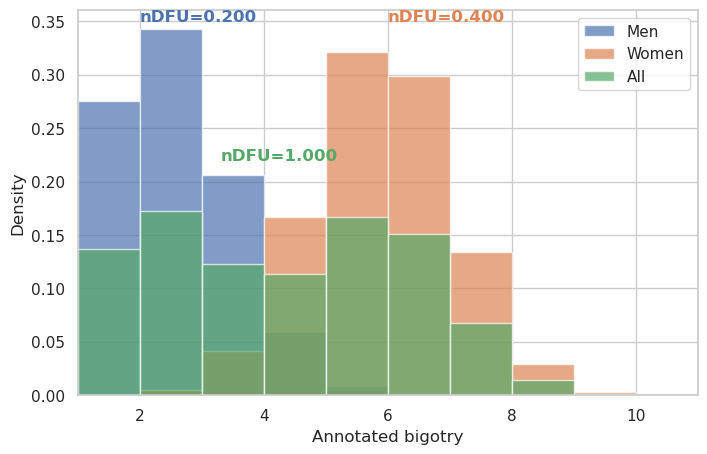

In [36]:
colors = sns.color_palette()
k = 10
x = np.linspace(0, 10, k)
d1_mean = 2
d2_mean = 6

d1 = gaussian(x, mu=d1_mean, sigma=1.3)
d2 = gaussian(x, mu=d2_mean, sigma=1.3)
d_union = d1 + d2

n_d1 = ndfu(d1)
n_d2 = ndfu(d2)
n_union = ndfu(d_union)
ndfus = [n_d1, n_d2, n_union]

x_values = [d1_mean, d2_mean, (d1_mean + d2_mean) / 2 - 0.7]
y_values = [0.35, 0.35, 0.22]

plt.figure(figsize=(8, 5))
plt.hist(x, weights=d1, bins=k, density=True, alpha=0.7, color=colors[0], label="Men")
plt.hist(x, weights=d2, bins=k, density=True, alpha=0.7, color=colors[1], label="Women")
plt.hist(x, weights=d_union, bins=k, density=True, alpha=0.7, color=colors[2], label="All")

# Annotating nDFU values
for pos, val, color, ndfu_value in zip(x_values, y_values, colors, ndfus):
    text = f"nDFU={ndfu_value:.3f}"
    plt.text(pos, val, text, color=color, weight="bold")


plt.xlim(1, 11)
plt.legend()
plt.xlabel("Annotated bigotry")
plt.ylabel("Density")

save_plot(GRAPH_DIR / "ndfu_single_comment.png")
plt.show()

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_multi_comment.png


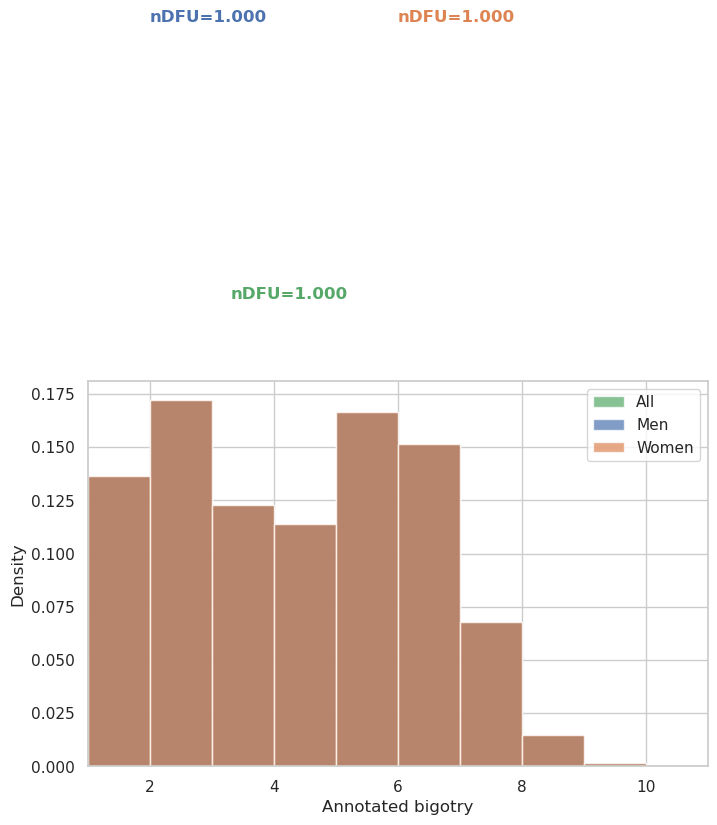

In [42]:
d_woman_comment1 = gaussian(x, mu=d1_mean, sigma=1.3)
d_woman_comment2 = gaussian(x, mu=d2_mean, sigma=1.3)

d_man_comment1 = gaussian(x, mu=d2_mean, sigma=1.3)
d_man_comment2 = gaussian(x, mu=d1_mean, sigma=1.3)

d_woman = d_woman_comment1 + d_woman_comment2
d_man = d_man_comment1 + d_man_comment2

n_d1 = ndfu(d_woman)
n_d2 = ndfu(d_man)
n_union = ndfu(d_union)
ndfus = [n_d1, n_d2, n_union]

x_values = [d1_mean, d2_mean, (d1_mean + d2_mean) / 2 - 0.7]
y_values = [0.35, 0.35, 0.22]

plt.figure(figsize=(8, 5))
plt.hist(x, weights=d_union, bins=k, density=True, alpha=0.7, color=colors[2], label="All")
plt.hist(x, weights=d_woman, bins=k, density=True, alpha=0.7, color=colors[0], label="Men")
plt.hist(x, weights=d_man, bins=k, density=True, alpha=0.7, color=colors[1], label="Women")

# Annotating nDFU values
for pos, val, color, ndfu_value in zip(x_values, y_values, colors, ndfus):
    text = f"nDFU={ndfu_value:.3f}"
    plt.text(pos, val, text, color=color, weight="bold")


plt.xlim(1, 11)
plt.legend()
plt.xlabel("Annotated bigotry")
plt.ylabel("Density")

plt.show()